In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

https://www.datacamp.com/courses/foundations-of-predictive-analytics-in-python-part-1

> ### part 1. Forward stepwise variable selection

 - Empty set
 - Find best variable v_1v
 - Find best variable v_2v in combination with v_1v
 - Find best variable v_3v in combination with v_1, v_2v
 - ...

(Until all variables are added or until predefined number of variables is added)


In [2]:
url = 'https://assets.datacamp.com/production/repositories/1441/datasets/7abb677ec52631679b467c90f3b649eb4f8c00b2/basetable_ex2_4.csv'
data = pd.read_csv(url)
data.head(3)

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.0,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.0,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.0,9


In [21]:
# Load the partitioning module
from sklearn.cross_validation import train_test_split

# Create dataframes with variables and target
X = data.drop("target", 1)
y = data["target"]

# Carry out  partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)


/Users/xduan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

"""
function auc is to train on train data and evaluate on test data of metric auc, which returns test_auc

varialbes: are features that are going to fit into model
target: prediction
train: X_train + y_train
test: X_test + y_test
"""
def auc(variables, target, train, test):
    logreg = LogisticRegression()
    X_train, X_test = train[variables], test[variables]
    y_train, y_test = train[target], test[target]
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred)
    return(auc)

"""
function next_best is to get the best variable to improve auc score after one loop
"""
def next_best(current_variables,candidate_variables, target, train, test):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, train, test)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable, best_auc


# candidate_variables = ["mean_gift","min_gift","max_gift","age","gender_F","country_USA","income_low"]
candidate_variables = [
 'gender_F',
 'income_high',
 'income_low',
 'country_USA',
 'country_India',
 'country_UK',
 'age',
 'time_since_last_gift',
 'time_since_first_gift',
 'max_gift',
 'min_gift',
 'mean_gift',
 'number_gift']
current_variables = []
target = ["target"]
auc_test_curve = []

max_number_variables = 100
number_iterations = min(max_number_variables, len(candidate_variables))

for i in range(0,number_iterations):
    next_variable, next_auc = next_best(current_variables,candidate_variables,target,train, test)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    auc_test_curve.append(next_auc)
#     print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")

print(current_variables)
# candidate_variables = ["mean_gift","min_gift","max_gift","age","gender_F","country_USA","income_low"]
# current_variables top 5: ['max_gift', 'age', 'mean_gift', 'min_gift', 'country_USA']



['max_gift', 'number_gift', 'mean_gift', 'time_since_last_gift', 'income_high', 'age', 'country_India', 'country_UK', 'country_USA', 'min_gift', 'income_low', 'time_since_first_gift', 'gender_F']


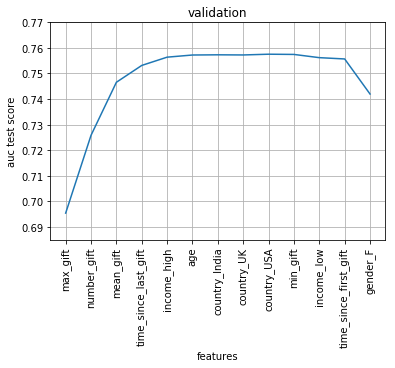

In [47]:
x = np.array(range(0,len(current_variables)))
y_plot = np.array(auc_test_curve)
plt.xticks(x, current_variables, rotation = 90)
plt.plot(x,y_plot)
plt.title('validation')
plt.xlabel('features')
plt.ylabel('auc test score')
plt.ylim((0.685, 0.77))
plt.grid()
plt.show()


In [ ]:

# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
for v in variables:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate, ["target"], train, test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    
# Make plot of the AUC values

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()

Variable added in step 1 is max_gift.
Variable added in step 2 is age.
Variable added in step 3 is mean_gift.
Variable added in step 4 is min_gift.
Variable added in step 5 is country_USA.
['max_gift', 'age', 'mean_gift', 'min_gift', 'country_USA']


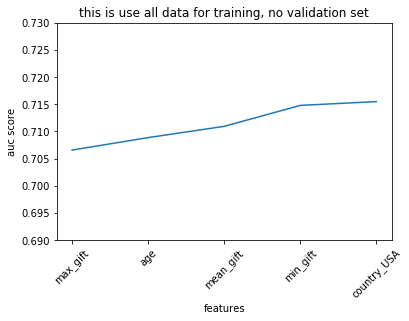

In [17]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

def auc(variables, target, basetable):
    X = basetable[variables]
    y = basetable[target]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return(auc)

def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable, best_auc

# ### for only select one (best one) feature ###
# current_variables = ["age","gender_F"]
# candidate_variables = ["min_gift","max_gift","mean_gift"]
# next_variable = next_best(current_variables, candidate_variables, basetable)
# print(next_variable) # "min_gift"



candidate_variables = ["mean_gift","min_gift","max_gift",
"age","gender_F","country_USA","income_low"]
current_variables = []
target = ["target"]
auc_train_curve = []

max_number_variables = 5
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range(0,number_iterations):
    next_variable, next_auc = next_best(current_variables,candidate_variables,target,data)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    auc_train_curve.append(next_auc)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
print(current_variables)
#['max_gift', 'mean_gift', 'min_gift', 'age', 'gender_F']


x = np.array(range(0,len(current_variables)))
y_plot = np.array(auc_train_curve)
plt.xticks(x, current_variables, rotation = 45)
plt.plot(x,y_plot)
plt.title('this is use all data for training, no validation set')
plt.xlabel('features')
plt.ylabel('auc score')
plt.ylim((0.69, 0.73))
plt.show()

> ### part 2. The cumulative gains curve


In [56]:
%%html
### cumulative
<img src = 'cumulative_gain.png', width = 400, height = 500>

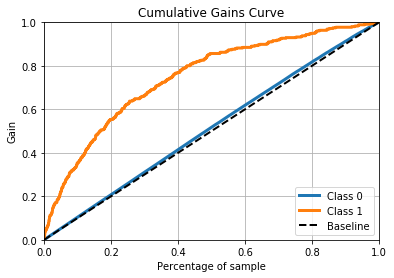

In [52]:
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
# Load the partitioning module
from sklearn.cross_validation import train_test_split

# Create dataframes with variables and target
X = data.drop("target", 1)
y = data["target"]

# Carry out  partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_probablity = logreg.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, y_pred_probablity)
plt.show()

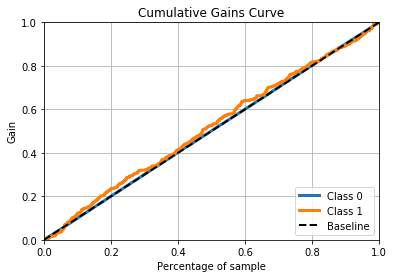

In [55]:
"""
random model's performance
"""

# Import the modules
import random
import matplotlib.pyplot as plt
import scikitplot as skplt

# Generate random predictions
random_predictions = [random.uniform(0,1) for _ in range(len(y_test))]

# Adjust random predictions
random_predictions = [(r, 1- r) for r in random_predictions]

# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test, random_predictions)
plt.show()

** - use of cumulative gains - **
  - Campaign selection: how many people you want to target to make a certain profit for a donotion campaign. 
  - example: 1 million users with 2% of target. But you don't want to send emails to all, since you don't want to bother donors who are not interested in donating this campaign.


In [ ]:
 """
  # Information about the campaign
population_size = 1000000
target_incidence = 0.02
# Number of targets you want to reach
number_targets_toreach = 16000
perc_targets = number_targets_toreach/(target_incidence*population_size)
print(perc_targets_toreach)
0.8
cumulative_gains = 0.60
# Number of donors to reach
number_donors_toreach = cumulative_gains*population_size
print(number_donors_toreach)
600 000 
 
 """


In [7]:
%%html
### lift model: lift curve shows how many times more than average the model reaches targets when a given percentage of the population that is most likely to be target according to the model is considered.
<img src = 'lift_curve.png', width = 400, height = 500>

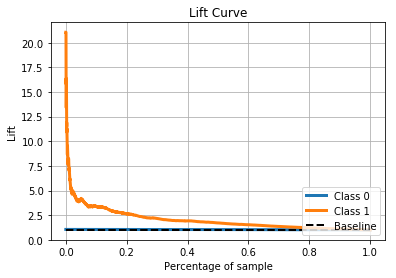

In [5]:
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
# Load the partitioning module
from sklearn.cross_validation import train_test_split

# Create dataframes with variables and target
X = data.drop("target", 1)
y = data["target"]

# Carry out  partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_probablity = logreg.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, y_pred_probablity)
# plt.xlim([0.0,1.0])
plt.show()

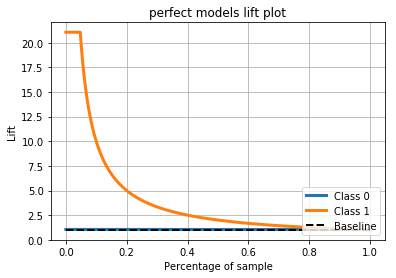

In [9]:
# Generate perfect predictions
"""
You can observe that the lift is first 20, which is normal as there are 5% targets: you can only have 20 times more than average targets. 
After that the lift gradually decreases because there are no targets to add anymore.
"""
perfect_predictions = [(1-target , target) for target in y_test]

# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test, perfect_predictions)
plt.title('perfect model''s lift plot')
plt.show()

- ** Estimating profit using lift **

- perc_targets is the percentage of targets in the group that you select for your campaign,
- perc_selected the percentage of people that is selected for the campaign,
- population_size the total population size,
- campaign_cost the cost of addressing a single person for the campaign, 
- campaign_reward the reward of addressing a target.

In [20]:
def profit(perc_targets, perc_selected, population_size,reward_target, cost_campaign):
    cost = cost_campaign * perc_selected * population_size
    reward = reward_target * perc_targets  * population_size * perc_selected
    return(reward - cost)

# Read the lift at 40% (round it up to the upper tenth)
perc_selected = 0.4
lift = 1.5

# Information about the campaign
population_size, target_incidence, campaign_cost, campaign_reward = 100000, 0.01, 1, 100
    
# Profit if all donors are targeted
profit_all = profit(target_incidence, 1, population_size, campaign_reward,campaign_cost)
print(profit_all) # 0 

# Profit if top 40% of donors are targeted
profit_40 = profit(target_incidence * lift, 0.4, population_size,  campaign_reward,campaign_cost)
print(profit_40) # 20000

0.0
20000.0


> ### part 3. Interpreting and explaining models



> ##### discrete continuous variables to insight
   - Which variables should be discretized
   - methods: ** pd.qcut and pd.cut ** use pd.qcut to get an idea and finally use pd.cut to make a clean ordered cut.


In [2]:
"""
convert continuous features to categorical ones
"""
basetable["disc_age"] = pd.qcut(basetable["age"], 5)
basetable["disc_age"].unique()
#[(38, 49], (68, 110], [19, 38], (49, 59], (59, 68]]  # not orderedly display


basetable["disc_age"] = pd.cut(basetable["age"],[18,30,40,50,60,110])
basetable.groupby("disc_age").size()

bins = [18,30,40,50,60,110]
labels = [1,2,3,4,5]
df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)

# disc_age
# (18, 30]     10017
# (30, 40]     14448
# (40, 50]     19002
# (50, 60]     24684
# (60, 110]    31849

In [ ]:
"""
discretize them automatically. 
"""
# Get all the variable names except "target"
variables = list(basetable.columns)
variables.remove("target")

# Loop through all the variables and discretize in 10 bins if there are more than 5 different values
for variable in variables:
    if len(basetable.groupby(variable))>5:
        new_variable = "disc_" + variable
        basetable[new_variable] = pd.qcut(basetable[variable], 10)
        
# Print the columns in the new basetable
print(basetable.columns)

> ###### predictor insight graphs
   - For each value the predictor takes, it has the number of observations with this value and the target incidence within this group. 
    


In [4]:
"""
Make a predictor insight graph
"""
import numpy as np
# Function that calculates the predictor insight graph table
def create_pig_table(df, target, variable):
    # Group by the variable you want to plot
    groups = df[[target,variable]].groupby(variable)
    # Calculate the size and incidence of each group
    pig_table = groups[target].agg(
             {'Incidence' : np.mean, \
              'Size' : np.size}).reset_index()
    return pig_table

In [ ]:
"""
Grouping all predictor insight graph tables
"""

# Create the list of variables for our predictor insight graph tables
variables = ["income","gender","disc_mean_gift","disc_time_since_last_gift"]

# Create an empty dictionary
pig_tables = {}

# Loop through the variables
for variable in variables:
  
    # Create a predictor insight graph table
    pig_table = create_pig_table(basetable, 'target', variable)
    
    # Add the table to the dictionary
    pig_tables[variable] = pig_table

# Print the predictor insight graph table of the variable "disc_time_since_last_gift"
print(pig_tables["disc_time_since_last_gift"])

- show insight graph

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# # The function to plot a predictor insight graph.
# def plot_incidence(pig_table,variable):
    
#     # Plot the incidence line
#     pig_table["Incidence"].plot()
    
#     # Formatting the predictor insight graph
#     plt.xticks(np.arange(len(pig_table)), pig_table[variable])
#     plt.xlim([-0.5, len(pig_table) - 0.5])
#     plt.ylim([0, max(pig_table["Incidence"] * 2)])
#     plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="right")
#     plt.xlabel(variable)
    
#     # Show the graph
#     plt.show()

# The function to plot a predictor insight graph
def plot_pig(pig_table, variable):
    
    # Plot formatting
    plt.ylabel("Size", rotation=0, rotation_mode="anchor", ha="right") ## to make the label horizontally
    
    # Plot the bars with sizes 
    pig_table["Size"].plot(kind="bar", width=0.5, color="lightgray", edgecolor="none") 
    
    # Plot the incidence line on secondary axis
    pig_table["Incidence"].plot(secondary_y=True)
    
    # Plot formatting
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="left")
    
    # Show the graph
    plt.show()

# Apply the function for the variable "country"
plot_pig(pig_table, "country")

# Variables you want to make predictor insight graph tables for
variables = ["income","gender","disc_mean_gift","disc_time_since_last_gift"]

# Loop through the variables
for variable in variables: 
    
    # Create the predictor insight graph table
    pig_table = create_pig_table(basetable, "target", variable)
    
    # Plot the predictor insight graph
    plot_pig(pig_table, variable)

> ### np.where

In [ ]:
basetable["no_donations"] = pd.Series([1 if b else 0 for b in basetable["total_donations"].isna()])

In [ ]:
purchase_data.price = np.where(np.isnan(purchase_data.price), 0, purchase_data.price)

sub_time = np.where(conv_sub_data.subscription_date.notnull(),(conv_sub_data.subscription_date -conv_sub_data.lapse_date).dt.days,
pd.NaT)



> ### filter data

In [ ]:
# We need data only for 'San Francisco'

# Matching with the string 'francisco' case insensitive which will get us the best mathes
relevant_index = sf_bus['City'].str.contains('francisco', case = False)

# Handling NA matches as False
relevant_index[relevant_index.isnull()] = False

# Filtering and storing data based on the index we built
sf_bus = sf_bus[relevant_index]

sf_bus.shape

In [ ]:
# Now, get the valid index of different types and combine them to get our clean data
ca_index = raw_data.State == 'CA' # state needs to be CA

sf_index = raw_data.City == 'San Francisco' # city needs to be San Francisco

both_active_index = raw_data['Location End Date'].isnull() & raw_data['Business End Date'].isnull()
# latitude belongs to [0,360], longtitude belongs to [-180,180]
# any value out of these scope regarded as invalid
valid_loc_index = (raw_data['latitude']>0) & (raw_data['longitude']>-180)


# Get clean data set
clean_data=raw_data[ca_index & sf_index & both_active_index & valid_loc_index]
     

> ## correlation

In [ ]:
- more visualized correlation table below

In [ ]:
columns = ['A','B','C']

data[columns].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

# correlation = np.corrcoef(basetable["A"], basetable["B"])[0,1]

> ### print in color

In [3]:
from termcolor import colored
print colored('hello', 'red'), colored('world', 'green')
print colored("hello red world", 'red')

hello world
hello red world


In [7]:
s = 23.4
print colored('hello', 'red'), colored(s, 'green')
print colored("hello red world", 'red')

hello 23.4
hello red world
